# Preprocessing jet-images
Author: Javier Duarte

In [1]:
import glob
import numpy as np
# get input numpy arrays
inputs = {}
inputs['TT'] = glob.glob('/home/woodson/machine-learning-hats/data/TT/*job*.npy')
inputs['QCD120'] = glob.glob('/home/woodson/machine-learning-hats/data/QCD_120to170/*job*.npy')
inputs['QCD170'] = glob.glob('/home/woodson/machine-learning-hats/data/QCD_170to300/*job*.npy')
inputs['QCD300'] = glob.glob('/home/woodson/machine-learning-hats/data/QCD_300to470/*job*.npy')
inputs['QCD470'] = glob.glob('/home/woodson/machine-learning-hats/data/QCD_470to600/*job*.npy')

import random
fraction_file = 0.3
max_file = 1

list_params = {}
params = {}
for key, input_files in inputs.iteritems():
    list_params[key] = []
    print key,len(input_files),"files"
    last_file = int(len(input_files)*fraction_file)+1 if fraction_file>0 else -1
    last_file = min(max_file, len(input_files)) if max_file else last_file
    if key=='TT': last_file*=20
    print "Getting",last_file,"/",len(input_files),"files"
    for in_file in input_files[:last_file]:
        try:
            print in_file
            arr = np.load(in_file)
            list_params[key].append(arr)
        except ValueError:
            print 'bad file: %s'%in_file
        except IOError:
            print 'bad io',in_file
    params[key] = np.concatenate(list_params[key])

QCD120 1 files
Getting 1 / 1 files
/home/woodson/machine-learning-hats/data/QCD_120to170/params0.npy_job0_file0.npy
TT 22 files
Getting 20 / 22 files
/home/woodson/machine-learning-hats/data/TT/params0.npy_job53_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job61_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job50_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job54_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job55_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job66_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job6_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job56_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job64_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job52_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job51_file0.npy
/home/woodson/machine-learning-hats/data/TT/params0.npy_job

In [7]:
# now let's prepare some jet images
pt_min = 200
pt_max = 500

df_dict_jet = {}
df_dict_jet['TT'] = pd.DataFrame(params['TT'],
                                 columns=['run', 'lumi', 'event', 'met', 'sumet', 'rho', 'pthat', 
                                          'mcweight', 'njet_ak7', 'jet_pt_ak7', 'jet_eta_ak7', 
                                          'jet_phi_ak7', 'jet_E_ak7', 'jet_msd_ak7', 'jet_area_ak7', 
                                          'jet_jes_ak7', 'jet_tau21_ak7', 'jet_isW_ak7', 'jet_ncand_ak7',
                                          'ak7pfcand_ijet'])
df_dict_jet['TT'] = df_dict_jet['TT'].drop_duplicates()
df_dict_jet['TT'] =  df_dict_jet['TT'][(df_dict_jet['TT'].jet_pt_ak7 > pt_min) & (df_dict_jet['TT'].jet_pt_ak7 < pt_max) &  (df_dict_jet['TT'].jet_isW_ak7==1)]

df_dict_cand = {}
df_dict_cand['TT'] = pd.DataFrame(params['TT'],
                                  columns=['event', 'jet_pt_ak7', 'jet_isW_ak7', 'ak7pfcand_pt', 'ak7pfcand_eta', 'ak7pfcand_phi', 'ak7pfcand_id', 'ak7pfcand_charge', 'ak7pfcand_ijet'])
df_dict_cand['TT'] =  df_dict_cand['TT'][(df_dict_cand['TT'].jet_pt_ak7 > pt_min) & (df_dict_cand['TT'].jet_pt_ak7 < pt_max) &  (df_dict_cand['TT'].jet_isW_ak7==1)]

print 'number of W jets: %i'%len(df_dict_jet['TT'])

for QCDbin in ['QCD120','QCD170','QCD300','QCD470']:
    df_dict_jet[QCDbin] = pd.DataFrame(params[QCDbin],columns=['run', 'lumi', 'event', 'met', 'sumet', 'rho', 'pthat', 
                                                               'mcweight', 'njet_ak7', 'jet_pt_ak7', 'jet_eta_ak7', 
                                                               'jet_phi_ak7', 'jet_E_ak7', 'jet_msd_ak7', 'jet_area_ak7', 
                                                               'jet_jes_ak7', 'jet_tau21_ak7', 'jet_isW_ak7', 'jet_ncand_ak7',
                                                               'ak7pfcand_ijet'])
    df_dict_jet[QCDbin] = df_dict_jet[QCDbin].drop_duplicates()
    df_dict_jet[QCDbin] =  df_dict_jet[QCDbin][(df_dict_jet[QCDbin].jet_pt_ak7 > pt_min) & (df_dict_jet[QCDbin].jet_pt_ak7 < 500) &  (df_dict_jet[QCDbin].jet_isW_ak7==0)]
    # take every 20th jet just to make the training faster and have a sample roughly the size of W jets
    df_dict_jet[QCDbin] = df_dict_jet[QCDbin].iloc[::20, :]
    
    df_dict_cand[QCDbin] = pd.DataFrame(params[QCDbin],columns=['event', 'jet_pt_ak7', 'jet_isW_ak7', 'ak7pfcand_pt', 'ak7pfcand_eta', 'ak7pfcand_phi', 'ak7pfcand_id', 'ak7pfcand_charge', 'ak7pfcand_ijet'])
    df_dict_cand[QCDbin] =  df_dict_cand[QCDbin][(df_dict_cand[QCDbin].jet_pt_ak7 > 200) & (df_dict_cand[QCDbin].jet_pt_ak7 < 500) &  (df_dict_cand[QCDbin].jet_isW_ak7==0)]
    
    print 'number of QCD jets in bin %s: %i'%( QCDbin, len(df_dict_jet[QCDbin]))
    
df_dict_jet['QCD'] = pd.concat([df_dict_jet['QCD120'],df_dict_jet['QCD170'],df_dict_jet['QCD300'],df_dict_jet['QCD470']])
df_dict_cand['QCD'] = pd.concat([df_dict_cand['QCD120'],df_dict_cand['QCD170'],df_dict_cand['QCD300'],df_dict_cand['QCD470']])


number of W jets: 1821
number of QCD jets in bin QCD120: 37
number of QCD jets in bin QCD170: 690
number of QCD jets in bin QCD300: 1649
number of QCD jets in bin QCD470: 929


In [25]:
# rotation + (possible) reflection needed later
def rotate_and_reflect(x,y,w):
    rot_x = []
    rot_y = []
    theta = 0
    maxPt = -1
    for ix, iy, iw in zip(x, y, w):
        dv = np.matrix([[ix],[iy]])-np.matrix([[x.iloc[0]],[y.iloc[0]]])
        dR = np.linalg.norm(dv)
        thisPt = iw
        if dR > 0.35 and thisPt > maxPt:
            maxPt = thisPt
            # rotation in eta-phi plane c.f  https://arxiv.org/abs/1407.5675 and https://arxiv.org/abs/1511.05190:
            # theta = -np.arctan2(iy,ix)-np.radians(90)
            # rotation by lorentz transformation c.f. https://arxiv.org/abs/1704.02124:
            px = iw * np.cos(iy)
            py = iw * np.sin(iy)
            pz = iw * np.sinh(ix)
            theta = np.arctan2(py,pz)+np.radians(90)
            
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    for ix, iy, iw in zip(x, y, w):
        # rotation in eta-phi plane:
        #rot = R*np.matrix([[ix],[iy]])
        #rix, riy = rot[0,0], rot[1,0]
        # rotation by lorentz transformation
        px = iw * np.cos(iy)
        py = iw * np.sin(iy)
        pz = iw * np.sinh(ix)
        rot = R*np.matrix([[py],[pz]])
        px1 = px
        py1 = rot[0,0]
        pz1 = rot[1,0]
        iw1 = np.sqrt(px1*px1+py1*py1)
        rix, riy = np.arcsinh(pz1/iw1), np.arcsin(py1/iw1)
        rot_x.append(rix)
        rot_y.append(riy)
        
    # now reflect if leftSum > rightSum
    leftSum = 0
    rightSum = 0
    for ix, iy, iw in zip(x, y, w):
        if ix > 0: 
            rightSum += iw
        elif ix < 0:
            leftSum += iw
    if leftSum > rightSum:
        ref_x = [-1.*rix for rix in rot_x]
        ref_y = rot_y
    else:
        ref_x = rot_x
        ref_y = rot_y
    
    return np.array(ref_x), np.array(ref_y)

import matplotlib as mpl
import keras.backend as K

nx = 30 # size of image in eta
ny = 30 # size of image in phi
xbins = np.linspace(-1.4,1.4,nx+1)
ybins = np.linspace(-1.4,1.4,ny+1)

def prepareImages(process, df_dict_cand, df_dict_jet):
    list_x = []
    list_y = []
    list_w = []
    if K.image_dim_ordering()=='tf':
        jet_images = np.zeros((len(df_dict_jet[process]), nx, ny, 1))
    else:        
        jet_images = np.zeros((len(df_dict_jet[process]), 1, nx, ny))
    
    for i in range(0,len(df_dict_jet[process])):
        # get the ith jet
        df_dict_cand_i = df_dict_cand[process][(df_dict_cand[process]['ak7pfcand_ijet'] == df_dict_jet[process]['ak7pfcand_ijet'].iloc[i]) & (df_dict_cand[process]['event'] == df_dict_jet[process]['event'].iloc[i]) ]
        # relative eta
        x = df_dict_cand_i['ak7pfcand_eta']-df_dict_cand_i['ak7pfcand_eta'].iloc[0]
        # relative phi
        y = df_dict_cand_i['ak7pfcand_phi']-df_dict_cand_i['ak7pfcand_phi'].iloc[0]
        weights = df_dict_cand_i['ak7pfcand_pt'] # pt of candidate is the weight
        x,y = rotate_and_reflect(x,y,weights)
        list_x.append(x)
        list_y.append(y)
        list_w.append(weights)
        hist, xedges, yedges = np.histogram2d(x, y, weights=weights, bins=(xbins,ybins))
        for ix in range(0,nx):
            for iy in range(0,ny):
                if K.image_dim_ordering()=='tf':
                    jet_images[i,ix,iy,0] = hist[ix,iy]
                else:
                    jet_images[i,0,ix,iy] = hist[ix,iy]
    return jet_images

In [26]:
jet_images_dict = {}
# 4D tensor (tensorflow backend)
# 1st dim is jet index
# 2nd dim is eta bin
# 3rd dim is phi bin
# 4th dim is pt value (or rgb layer, etc.)

jet_images_dict['TT'] = prepareImages('TT', df_dict_cand, df_dict_jet)
jet_images_dict['QCD'] = prepareImages('QCD', df_dict_cand, df_dict_jet)

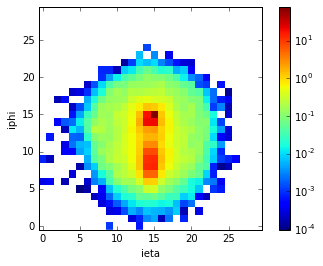

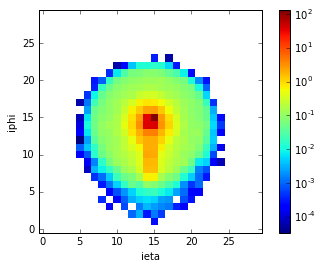

In [76]:
import h5py
h5f = h5py.File("data/jet_images.h5", "w")
h5f.create_dataset('QCD', data=jet_images_dict['QCD'], compression='lzf')
h5f.create_dataset('TT', data=jet_images_dict['TT'], compression='lzf')
h5f.close()